We are given the Iris Flower dataset on Kaggle.Our job is to build a model to classify the species of the flowers.Following are the contents of the notebook:

* Overview of Dataset.
* Data Visualization
* Applying Machine Learning Model
* Validation of Results
* Conclusion

I have opted for using **Decision Trees** to classify the dataset.

# Overview of Dataset:

Let's begin by loading the dataset.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the shape of the dataset.
df.shape

(150, 5)

First we see how many unique species are present in the dataset.

In [3]:
#checking number of individual species
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

So we have a balanced dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in the dataset.

# Data Visualization

Let's make some plots and graphs to try to understand our data better.

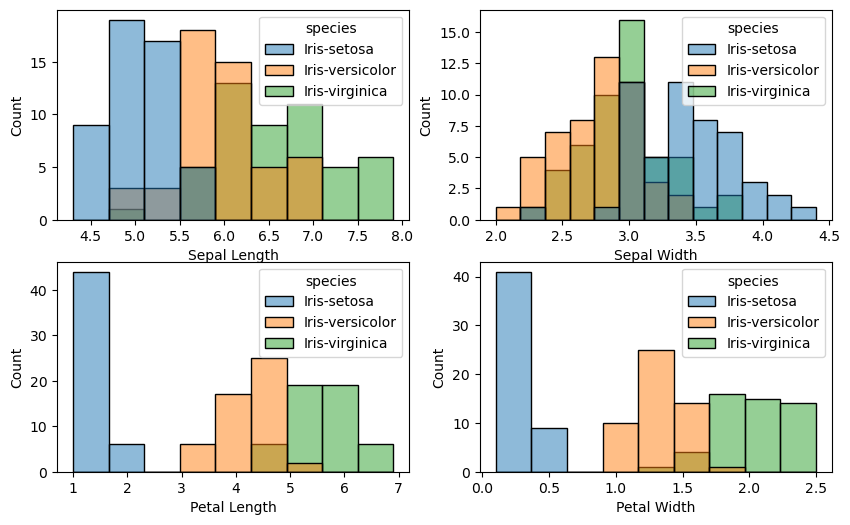

In [27]:
#Histograms of features
plt.figure(figsize=(10, 6))  
plt.subplot(2,2,1)
sns.histplot(data=df,x='sepal_length',hue='species')
plt.xlabel('Sepal Length')

plt.subplot(2,2,2)
sns.histplot(data=df,x='sepal_width',hue='species')
plt.xlabel('Sepal Width')

plt.subplot(2,2,3)
sns.histplot(data=df,x='petal_length',hue='species')
plt.xlabel('Petal Length')

plt.subplot(2,2,4)
sns.histplot(data=df,x='petal_width',hue='species')
plt.xlabel('Petal Width')
plt.show()

We can also make box plots to assess the different features of each species.

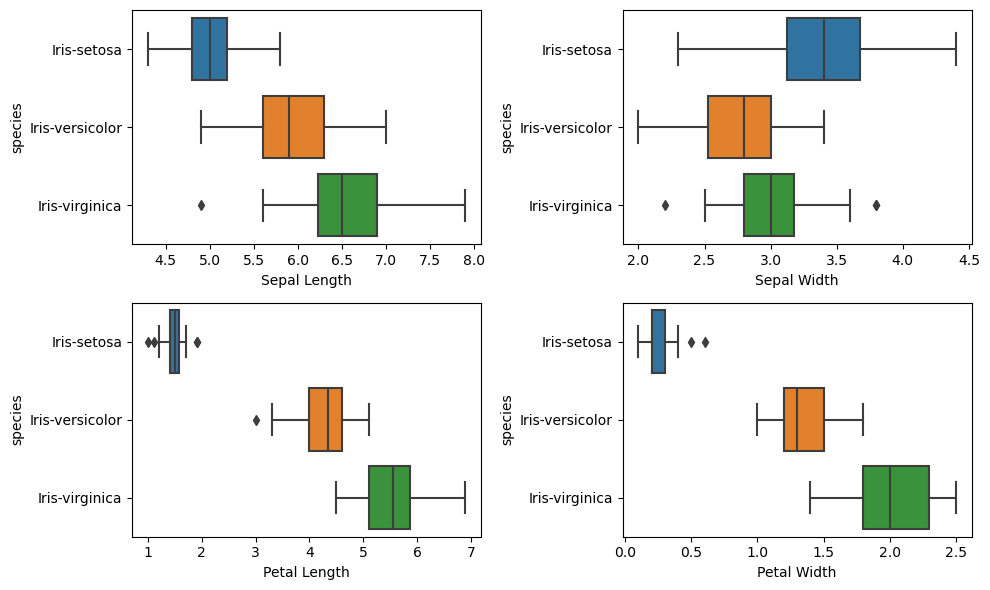

In [28]:
#Boxplots of features
plt.figure(figsize=(10, 6))  
plt.subplot(2,2,1)
sns.boxplot(data=df,x='sepal_length',y='species')
plt.xlabel('Sepal Length')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='sepal_width',y='species')
plt.xlabel('Sepal Width')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='petal_length',y='species')
plt.xlabel('Petal Length')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='petal_width',y='species')
plt.xlabel('Petal Width')
plt.tight_layout()
plt.show()

# Implementing Machine Learning Model

Let's try to implement Decision Tree model.

In [10]:
x=df.drop(['species'],axis=1)
y=df['species']

## Splitting Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Implementing Decision Tree with GINI Index Criterion

In [12]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [13]:
# predicting test results
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [14]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9667


[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

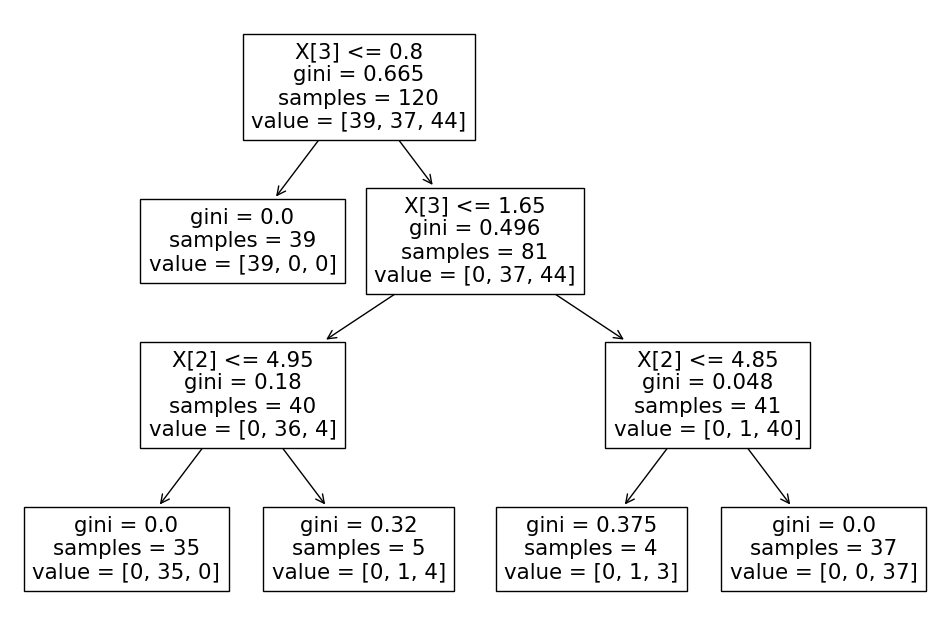

In [15]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

In [16]:
## Implementing Decision Tree with Entropy Criterion
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
# predicting test results

y_pred_en = clf_en.predict(x_test)

In [18]:
# check accuracy score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9667


[Text(0.375, 0.875, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

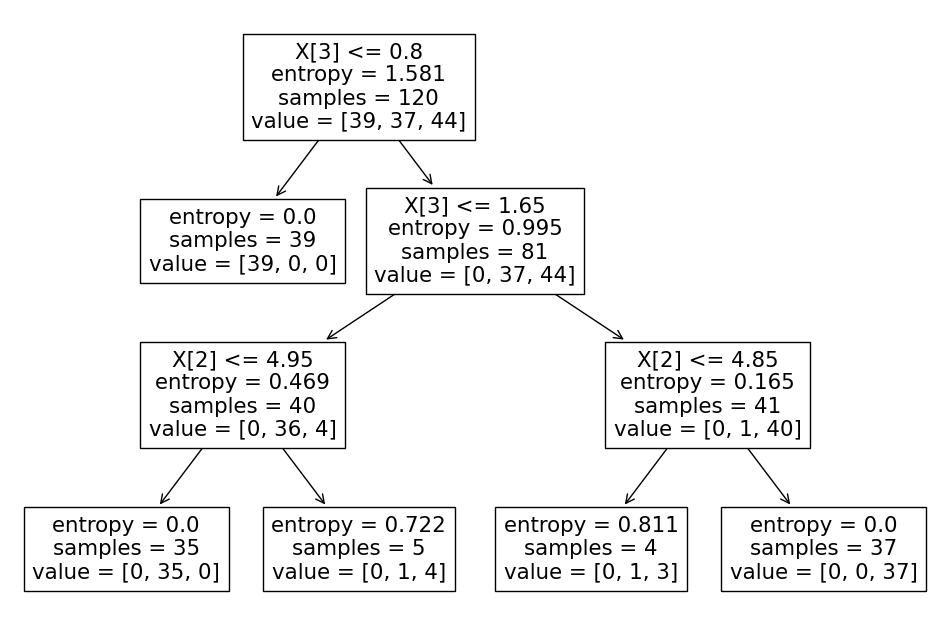

In [19]:
## Visualize trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

# Validation of Results

We can measure the performance of our model using metrics such as a confusion matrix and a classification report.

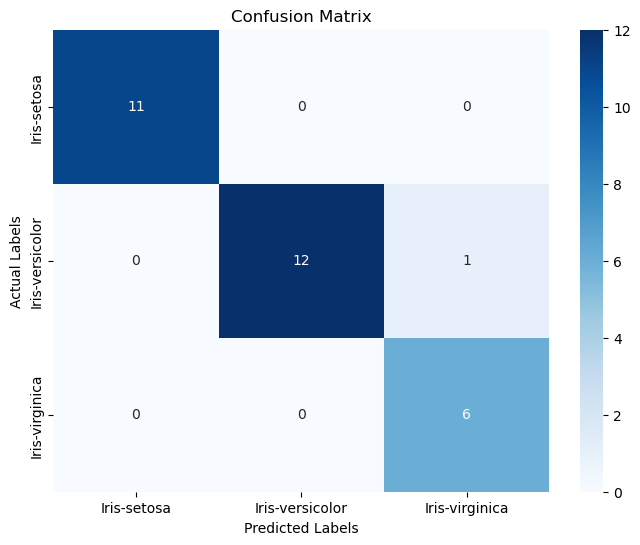

In [22]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_en)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [23]:
from sklearn.metrics import classification_report

# Calculate the F1-Score for polynomial kernel
class_poly = classification_report(y_test, y_pred_en)

# Print the F1-Score
print( class_poly)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Conclusion:

We implemented the decision tree model on our dataset,using two criteria, the GINI Index and Entropy. Both criteria gave us the same performance. The accuracy score came out as 96.67%. The results were further validated by using a confusion matrix and classification report.